In [ ]:
# Instalar a biblioteca or-tools
!pip install python-constraint
!pip install ortools

  Preparing metadata (setup.py) ... done
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24059 sha256=5bd49eb3a982504ddbe34a995fd71cf38a3be4277a2794c462d26aa2f92ae7ec
  Stored in directory: /root/.cache/pip/wheels/2e/f2/2b/cb08b5fe129e4f69b7033061f256e5c551b0aa1160c2872aee
Successfully built python-constraint
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 21.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the p

In [ ]:
# Importar biblioteca or-tools
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt

In [ ]:
# Carregar Ficheiro
from google.colab import files

uploaded = files.upload()
file_path = ""
for fn in uploaded.keys():
  file_path = fn

print(file_path)

Saving p01_dataset_8.txt to p01_dataset_8.txt
p01_dataset_8.txt


In [ ]:
# Este código processa um ficheiro estruturado contendo informações sobre projectos, tarefas, relações de precedência e recursos.
# Ele lê o ficheiro linha por linha, identificando secções através de cabeçalhos específicos, como "#General Information" ou "#Projects summary".
# Em cada secção, extrai dados relevantes e organiza-os num dicionário chamado data.
# No final, o código retorna um dicionário estruturado com todos os dados organizados, permitindo o seu uso posterior para análise ou processamento adicional.

def parse_file(file_path):
    data = {
        'general_info': {},  # Informações gerais
        'projects_summary': [],  # Resumo dos projectos
        'precedence_relations': {  # Relações de precedência
            'jobnr': [],  # Número da tarefa
            'modes': [],  # Modos da tarefa
            'num_successors': [],  # Número de sucessores
            'successors': []  # Lista de sucessores
        },
        'duration_resources': {  # Duração e recursos
            'jobnr': [],  # Número da tarefa
            'mode': [],  # Modo da tarefa
            'duration': [],  # Duração da tarefa
            'R': {}  # Recursos utilizados
        },
        'resource_availability': {}  # Disponibilidade de recursos
    }
    current_section = None  # Para rastrear a secção que está a ser lida

    # Abre o ficheiro para leitura
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Remove espaços em branco no início e fim

            # Ignorar cabeçalhos e linhas de comentários
            if line.startswith("##") or line.startswith("*") or not line:
                continue

            # Identificar secções
            if line.startswith("#General Information"):
                current_section = 'general_info'
                continue
            elif line.startswith("#Projects summary"):
                current_section = 'projects_summary'
                continue
            elif line.startswith("#Precedence relations"):
                current_section = 'precedence_relations'
                continue
            elif line.startswith("#Duration and resources"):
                current_section = 'duration_resources'
                continue
            elif line.startswith("#Resource availability"):
                current_section = 'resource_availability'
                continue

            # Processar com base na secção atual
            if current_section == 'general_info':
                # Não há dados específicos para informações gerais no exemplo
                pass

            elif current_section == 'projects_summary':
                # Divide a linha por espaços para obter os detalhes do resumo do projecto
                parts = line.split()
                if parts[0].isdigit():
                    project = {
                        'pronr': int(parts[0]),  # Número do projecto
                        'jobs': int(parts[1]),  # Número de tarefas
                        'rel_date': int(parts[2]),  # Data de início
                        'due_date': int(parts[3]),  # Data limite
                        'tard_cost': int(parts[4]),  # Custo por atraso
                        'mpm_time': int(parts[5])  # Tempo MPM
                    }
                    data['projects_summary'].append(project)

            elif current_section == 'precedence_relations':
                parts = line.split()
                if parts[0].isdigit():
                    data['precedence_relations']['jobnr'].append(int(parts[0]))
                    data['precedence_relations']['modes'].append(int(parts[1]))
                    data['precedence_relations']['num_successors'].append(int(parts[2]))
                    data['precedence_relations']['successors'].append(list(map(int, parts[3:])))

            elif current_section == 'duration_resources':
                parts = line.split()
                if parts[0].isdigit():
                    data['duration_resources']['jobnr'].append(int(parts[0]))
                    data['duration_resources']['mode'].append(int(parts[1]))
                    data['duration_resources']['duration'].append(int(parts[2]))
                    job_number = int(parts[0])
                    # Processamento dinâmico dos recursos com nome e quantidade:
                    for i in range(3, len(parts)):
                        resource_name = f"R{i - 2}"  # Nome do recurso
                        resource_qty = int(parts[i])  # Quantidade do recurso

                        # Se o número da tarefa não existir, cria uma lista
                        if job_number not in data['duration_resources']['R']:
                            data['duration_resources']['R'][job_number] = []

                        # Adiciona o recurso ao número da tarefa específico
                        data['duration_resources']['R'][job_number].append(f"{resource_name} : {resource_qty}")

            elif current_section == 'resource_availability':
                parts = line.split()
                if parts[0].startswith("R"):
                    resource = parts[0]  # Nome do recurso
                    qty = int(parts[1])  # Quantidade disponível
                    data['resource_availability'][resource] = qty

    return data



In [ ]:
# Este código utiliza a função parse_file para analisar um ficheiro de entrada estruturado e aceder a diferentes categorias de dados extraídos.
# Ele apresenta as informações organizadas de forma legível para o utilizador.
# O código é essencialmente um script de teste ou demonstração para verificar e exibir os dados processados pela função parse_file.
# É útil para garantir que as informações foram interpretadas corretamente.

# Caminho para o ficheiro
parsed_data = parse_file(file_path)

# Aceder às listas de Relações de Precedência
print("Relações de Precedência:")
print("Números de Tarefas:", parsed_data['precedence_relations']['jobnr'])
print("Modos:", parsed_data['precedence_relations']['modes'])
print("Número de Sucessores:", parsed_data['precedence_relations']['num_successors'])
print("Sucessores:", parsed_data['precedence_relations']['successors'])

# Aceder às listas de Duração e Recursos
print("\nDuração e Recursos:")
print("Números de Tarefas:", parsed_data['duration_resources']['jobnr'])
print("Modos:", parsed_data['duration_resources']['mode'])
print("Durações:", parsed_data['duration_resources']['duration'])
print("Recursos:", parsed_data['duration_resources']['R'])

# Aceder à Disponibilidade de Recursos
print("\nDisponibilidade de Recursos:")
print("Recursos:", parsed_data['resource_availability'])




Relações de Precedência:
Números de Tarefas: [1, 2, 3, 4, 5, 6, 7, 8]
Modos: [1, 1, 1, 1, 1, 1, 1, 1]
Número de Sucessores: [2, 1, 1, 0, 2, 1, 1, 0]
Sucessores: [[2, 3], [4], [4], [], [6, 7], [8], [8], []]

Duração e Recursos:
Números de Tarefas: [1, 2, 3, 4, 5, 6, 7, 8]
Modos: [1, 1, 1, 1, 1, 1, 1, 1]
Durações: [2, 3, 4, 1, 2, 3, 4, 1]
Recursos: {1: ['R1 : 1', 'R2 : 0'], 2: ['R1 : 0', 'R2 : 1'], 3: ['R1 : 0', 'R2 : 1'], 4: ['R1 : 0', 'R2 : 1'], 5: ['R1 : 1', 'R2 : 0'], 6: ['R1 : 0', 'R2 : 1'], 7: ['R1 : 0', 'R2 : 1'], 8: ['R1 : 0', 'R2 : 1']}

Disponibilidade de Recursos:
Recursos: {'R1': 1, 'R2': 2}


In [ ]:
# Este código cria um dicionário estruturado chamado job_successors para organizar informações detalhadas sobre cada tarefa (job).
# Ele associa os números das tarefas (Job Numbers) aos seus sucessores, durações e recursos necessários.
# Este código é útil para criar uma visão consolidada do plano de trabalho, incluindo dependências (sucessores) e requisitos de recursos para cada tarefa.

# Cria um dicionário para associar os números das tarefas (Job Numbers) aos seus sucessores
job_successors = {}

for i in range(len(parsed_data['precedence_relations']['jobnr'])):
    job_number = parsed_data['precedence_relations']['jobnr'][i]  # Número da tarefa
    successors = parsed_data['precedence_relations']['successors'][i]  # Sucessores da tarefa
    duration = parsed_data['duration_resources']['duration'][i]  # Duração da tarefa

    resource = parsed_data['duration_resources']['R'][job_number]  # Recursos necessários para a tarefa

    # Inicializa o dicionário para o número da tarefa, se ainda não existir
    if job_number not in job_successors:
        job_successors[job_number] = {}

    job_successors[job_number]['successors'] = successors  # Adiciona os sucessores
    job_successors[job_number]['duration'] = duration  # Adiciona a duração
    job_successors[job_number]['resource'] = resource  # Adiciona os recursos

# Exibe o dicionário dos sucessores
print("Dicionário de Sucessores das Tarefas:")
job_successors


Dicionário de Sucessores das Tarefas:


{1: {'successors': [2, 3], 'duration': 2, 'resource': ['R1 : 1', 'R2 : 0']},
 2: {'successors': [4], 'duration': 3, 'resource': ['R1 : 0', 'R2 : 1']},
 3: {'successors': [4], 'duration': 4, 'resource': ['R1 : 0', 'R2 : 1']},
 4: {'successors': [], 'duration': 1, 'resource': ['R1 : 0', 'R2 : 1']},
 5: {'successors': [6, 7], 'duration': 2, 'resource': ['R1 : 1', 'R2 : 0']},
 6: {'successors': [8], 'duration': 3, 'resource': ['R1 : 0', 'R2 : 1']},
 7: {'successors': [8], 'duration': 4, 'resource': ['R1 : 0', 'R2 : 1']},
 8: {'successors': [], 'duration': 1, 'resource': ['R1 : 0', 'R2 : 1']}}

In [ ]:
# Este código utiliza a biblioteca or-tools para resolver um problema de organização de tarefas, respeitando as dependências
# entre elas e a disponibilidade de recursos. Primeiro, são criadas variáveis para representar os tempos de início e fim de cada tarefa,
# assegurando que estas começam apenas quando as anteriores terminam, como definido pelas relações de precedência.

# Além disso, o modelo verifica o uso de recursos, garantindo que nenhuma tarefa ultrapassa os limites disponíveis para cada recurso
# durante o planeamento. O objetivo principal é minimizar o tempo total necessário para completar todas as tarefas (conhecido como "makespan").
# Depois de resolver o modelo, o código apresenta os resultados, mostrando quando cada tarefa começa e termina.


# Criar o modelo
model = cp_model.CpModel()

# Variáveis para os tempos de início e fim
start_times = {}
end_times = {}
job_intervals = {}
resource_limits = parsed_data['resource_availability']  # Limites de recursos disponíveis

# Criar variáveis para cada tarefa
for job in job_successors:
    duration = job_successors[job]['duration']  # Duração da tarefa
    start_times[job] = model.NewIntVar(0, 200, f"start_{job}")  # Tempo de início
    end_times[job] = model.NewIntVar(0, 200, f"end_{job}")  # Tempo de fim
    job_intervals[job] = model.NewIntervalVar(
        start_times[job], duration, end_times[job], f"interval_{job}"
    )  # Intervalo da tarefa

# Adicionar restrições de dependências entre tarefas
for job, data in job_successors.items():
    for successor in data['successors']:
        model.Add(start_times[successor] >= end_times[job])  # O sucessor só pode começar depois que a tarefa atual terminar

# Adicionar restrições de recursos
resource_intervals = {r: [] for r in resource_limits}  # Intervalos por recurso
resource_demands = {r: [] for r in resource_limits}  # Demandas de cada recurso

for job, data in job_successors.items():
    for resource in data['resource']:
        resource_name, demand = resource.split(" : ")  # Nome e quantidade do recurso
        demand = int(demand)
        if demand > 0:  # Apenas incluir tarefas que utilizam o recurso
            resource_intervals[resource_name].append(job_intervals[job])
            resource_demands[resource_name].append(demand)

# Garantir que os recursos respeitam os limites de disponibilidade
for resource_name, intervals in resource_intervals.items():
    if intervals:
        model.AddCumulative(intervals, resource_demands[resource_name], resource_limits[resource_name])

# Minimizar o tempo total (makespan)
makespan = model.NewIntVar(0, 200, "makespan")  # Variável para o tempo total
model.AddMaxEquality(makespan, list(end_times.values()))  # Makespan é o maior tempo de fim
model.Minimize(makespan)  # Objetivo é minimizar o makespan

# Resolver o modelo
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Exibir a solução encontrada
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    print("Solução encontrada:")
    gantt_data = []
    for job in job_successors:
        start = solver.Value(start_times[job])  # Tempo de início da tarefa
        end = solver.Value(end_times[job])  # Tempo de fim da tarefa
        gantt_data.append((job, start, end, job_successors[job]['resource']))
        print(f"Tarefa {job}: Início = {start}, Fim = {end}")
    print(f"Tempo total (makespan): {solver.Value(makespan)}")
else:
    print("Nenhuma solução encontrada.")
    gantt_data = []




Solução encontrada:
Tarefa 1: Início = 2, Fim = 4
Tarefa 2: Início = 6, Fim = 9
Tarefa 3: Início = 5, Fim = 9
Tarefa 4: Início = 9, Fim = 10
Tarefa 5: Início = 0, Fim = 2
Tarefa 6: Início = 2, Fim = 5
Tarefa 7: Início = 2, Fim = 6
Tarefa 8: Início = 9, Fim = 10
Tempo total (makespan): 10


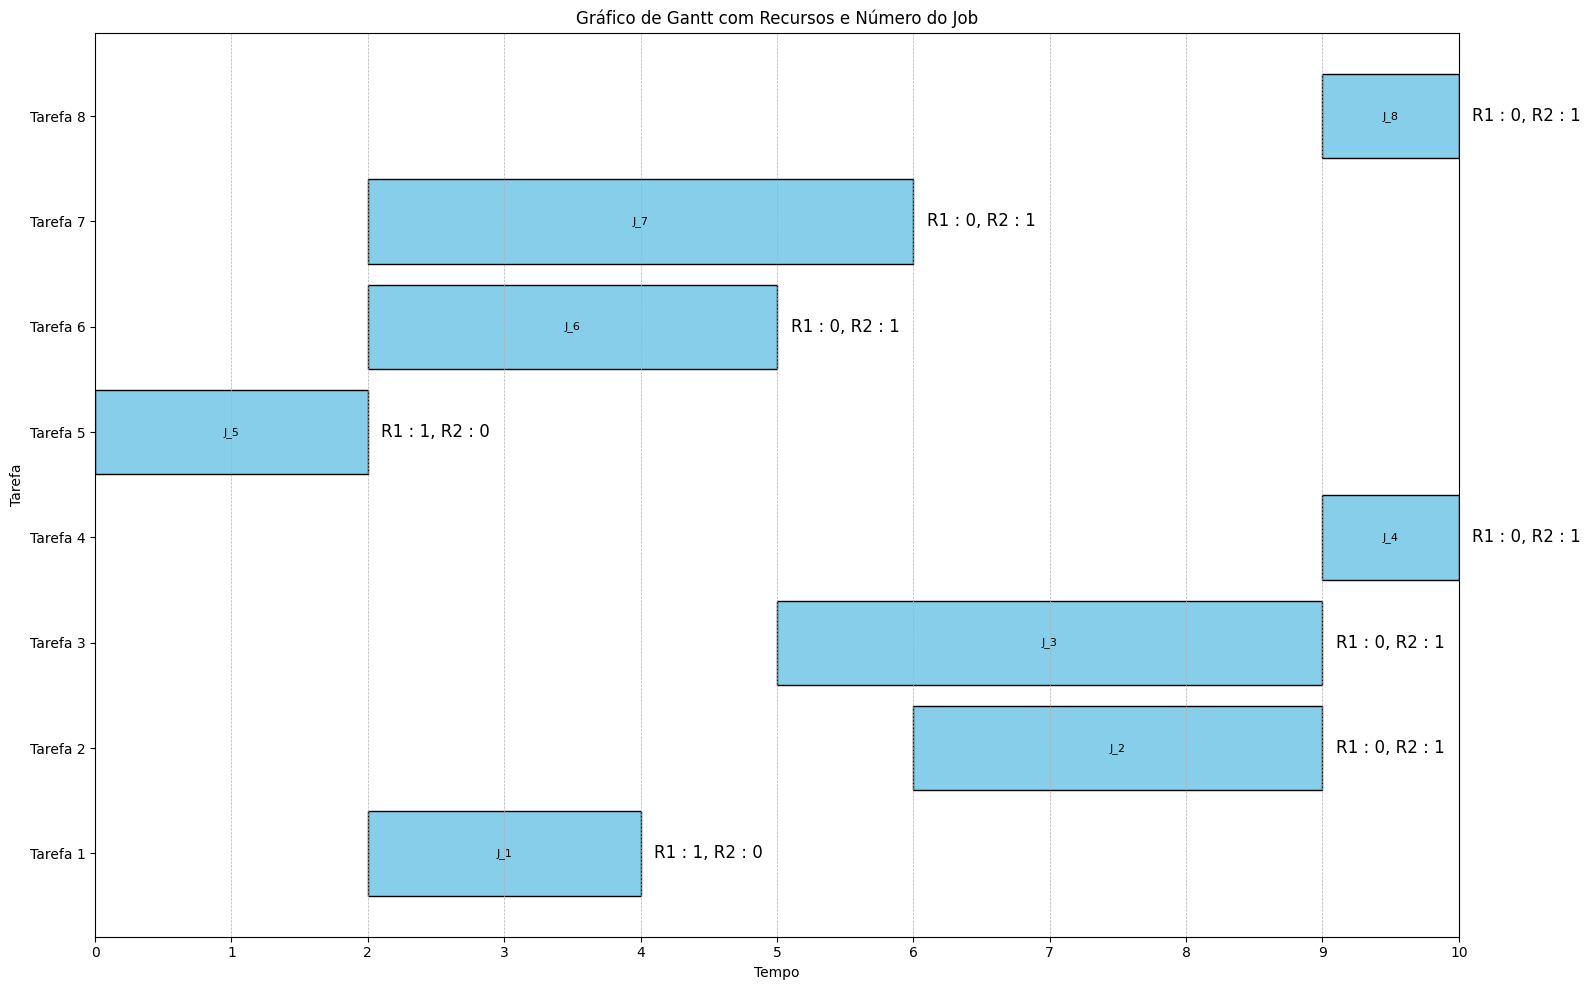

In [ ]:
# Para tornar tudo mais claro, é gerado um gráfico de Gantt, que ilustra o cronograma das tarefas e os recursos utilizados de forma visual e organizada. Este programa é especialmente
# útil para planear projetos de forma eficiente, otimizando o tempo e os recursos disponíveis.

# Gerar o gráfico de Gantt
if gantt_data:
    fig, ax = plt.subplots(figsize=(16, 10))
    max_time = solver.Value(makespan)

    for task_id, start, end, resources in gantt_data:
        duration = end - start
        resource_text = ", ".join(resources)
        # Desenhar a barra para a tarefa
        bar = ax.barh(task_id, duration, left=start, color='skyblue', edgecolor='black')
        # Adicionar o número do job dentro da barra
        ax.text(start + duration / 2, task_id, "J_" + str(task_id), va='center', ha='center', color='black', fontsize=8)
        # Adicionar texto com os recursos à frente da barra
        ax.text(end + 0.1, task_id, resource_text, va='center', ha='left', color='black', fontsize=12)

    # Adicionar uma linha de tempo detalhada
    ax.set_xticks(range(0, max_time + 1))
    ax.set_xlim(0, max_time)
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5)

    # Configurar rótulos e título
    ax.set_xlabel("Tempo")
    ax.set_ylabel("Tarefa")
    ax.set_title("Gráfico de Gantt com Recursos e Número do Job")
    ax.set_yticks(range(1, len(gantt_data) + 1))
    ax.set_yticklabels([f"Tarefa {job[0]}" for job in gantt_data])

    plt.tight_layout()
    plt.show()